### build a CNN with numpy

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [14]:
import os
data_path = "../../kaggle_data/digit-recognizer/"
print(os.listdir(data_path))

['number_picture.jpg', 'sample_submission.csv', 'submission.csv', 'test.csv', 'train.csv']


In [15]:
train = pd.read_csv(data_path+"train.csv")

In [16]:
train.shape

(42000, 785)

In [17]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
display(train.shape)

(42000, 785)

In [19]:
test = pd.read_csv(data_path+"test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
Y_train = train["label"]
X_train = train.drop("label", axis=1)

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

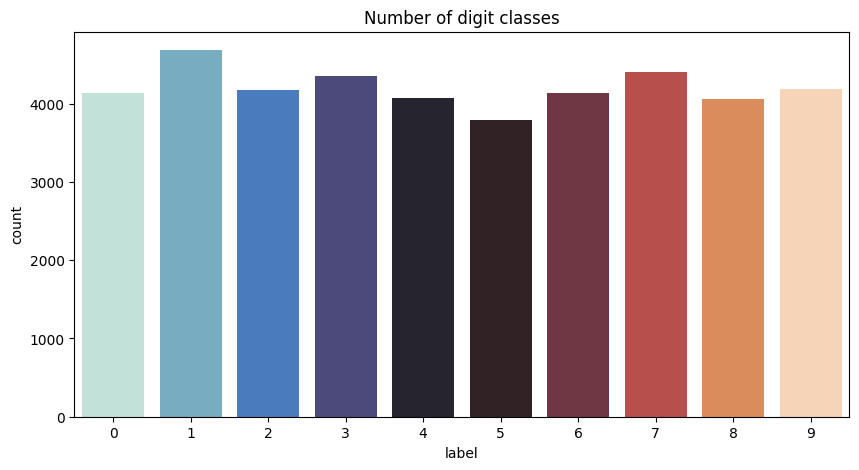

In [21]:
plt.figure(figsize=(10,5))
g = sns.countplot(x=Y_train, palette='icefire', hue=Y_train, legend=False)
plt.title("Number of digit classes")
Y_train.value_counts()

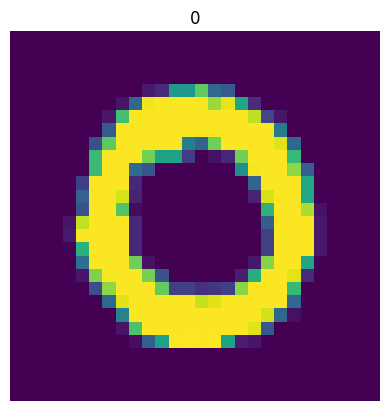

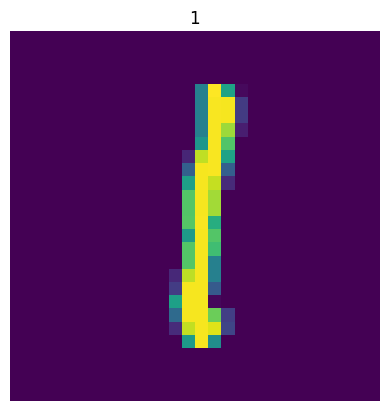

In [22]:
for i in random.sample(range(0, 100), 2):
    img = X_train.iloc[i].to_numpy()
    img = img.reshape((28, 28))
    plt.imshow(img)
    plt.title(train['label'][i])
    plt.axis('off')
    plt.show()

In [23]:
X_train = X_train / 255.0
test = test / 255.0
print('X_train shape: ', X_train.shape)
print('test shape', test.shape)

X_train shape:  (42000, 784)
test shape (28000, 784)


In [24]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1, 28, 28, 1)
print('x_train shape:', X_train.shape)
print('test shape:', test.shape)

x_train shape: (42000, 28, 28, 1)
test shape: (28000, 28, 28, 1)


In [27]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train, num_classes = 10)

In [32]:
Y_train[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800, 10)
(4200, 10)


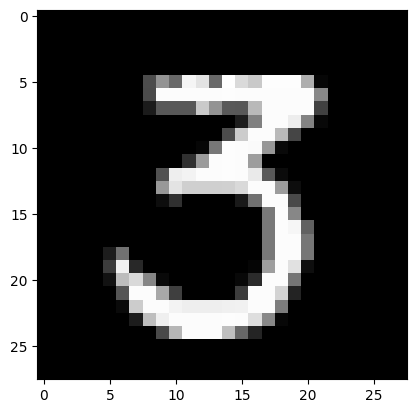

In [36]:
plt.imshow(X_train[3][:,:,0],cmap='gray')

In [40]:
from sklearn.metrics import confusion_matrix
import itertools

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [45]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [47]:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [50]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
epochs = 10
batch_size = 250

In [52]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=5,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False)

datagen.fit(X_train)

In [59]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=batch_size),
                              epochs=epochs, validation_data=(X_val, Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10


c:\Users\livid\miniconda3\envs\kaggle\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.4751 - loss: 1.5368 - val_accuracy: 0.9407 - val_loss: 0.2296
Epoch 2/10
  1/151 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7720 - loss: 0.6849

c:\Users\livid\miniconda3\envs\kaggle\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7720 - loss: 0.6849 - val_accuracy: 0.9438 - val_loss: 0.2205
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8527 - loss: 0.4635 - val_accuracy: 0.9638 - val_loss: 0.1323
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8720 - loss: 0.3739 - val_accuracy: 0.9655 - val_loss: 0.1300
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.8976 - loss: 0.3267 - val_accuracy: 0.9719 - val_loss: 0.1024
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9320 - loss: 0.2710 - val_accuracy: 0.9717 - val_loss: 0.1020
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9177 - loss: 0.2665 - val_accuracy: 0.9764 - val_loss: 0.0799
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9000 - loss: 0.3117 - val_accuracy: 0.9774 - val_loss: 0.0800
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9256 - loss: 0.2415 - val_accuracy: 0.9781 - 

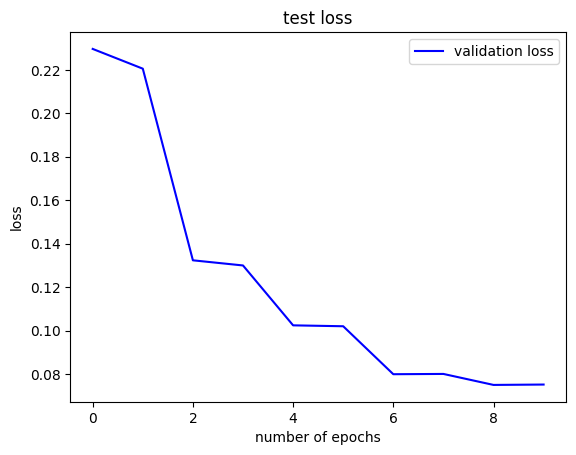

In [61]:
plt.plot(history.history['val_loss'], color='b', label='validation loss')
plt.title('test loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()